## Looking at names of politicians mentioned in Macron's agenda 

Using  regular expressions  

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%R
# install.packages("ggridges")
require('tidyverse')
library(ggridges)
library(ggplot2)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [114]:
#  read  elysée data

df = pd.read_csv('./testing_data/elysee.csv')

df

,date,month,time,desc,type,year
0,2017-05-14,5,10h00,Passation de pouvoir et cérémonie d'investiture,NaN,2017
1,2017-05-14,5,12h00,Cérémonie à l'hôtel de Ville de Paris,NaN,2017
2,2017-05-17,5,20h00,"Dîner avec M. Donald Tusk, Président du Consei...",NaN,2017
3,2017-05-18,5,11h00,Conseil des ministres,NaN,2017
4,2017-05-18,5,14h30,Conseil de défense,NaN,2017
...,...,...,...,...,...,...
3747,2023-04-04,4,18h00,Déplacement à Clamart sur le thème de la sensi...,Déplacement,2023
3748,2023-04-05,4,Toute la journée,Visite d'État en République populaire de Chine.,Voyage officiel,2023
3749,2023-04-06,4,Toute la journée,Visite d'État en République populaire de Chine.,Voyage officiel,2023
3750,2023-04-07,4,Toute la journée,Visite d'État en République populaire de Chine.,Voyage officiel,2023


In [115]:
df['names'] = df['desc'].str.extract(r'([A-Z]{1,}\s*[A-Z]{1,}\s*[A-Z]{1,})')

In [116]:
df

,date,month,time,desc,type,year,names
0,2017-05-14,5,10h00,Passation de pouvoir et cérémonie d'investiture,NaN,2017,NaN
1,2017-05-14,5,12h00,Cérémonie à l'hôtel de Ville de Paris,NaN,2017,NaN
2,2017-05-17,5,20h00,"Dîner avec M. Donald Tusk, Président du Consei...",NaN,2017,NaN
3,2017-05-18,5,11h00,Conseil des ministres,NaN,2017,NaN
4,2017-05-18,5,14h30,Conseil de défense,NaN,2017,NaN
...,...,...,...,...,...,...,...
3747,2023-04-04,4,18h00,Déplacement à Clamart sur le thème de la sensi...,Déplacement,2023,NaN
3748,2023-04-05,4,Toute la journée,Visite d'État en République populaire de Chine.,Voyage officiel,2023,NaN
3749,2023-04-06,4,Toute la journée,Visite d'État en République populaire de Chine.,Voyage officiel,2023,NaN
3750,2023-04-07,4,Toute la journée,Visite d'État en République populaire de Chine.,Voyage officiel,2023,NaN


In [117]:
# only keep the columns that aren't NaN

df = df.dropna(subset=['names'])

In [119]:
# get th value counts of the names

df = df['names'].value_counts()

# reset the index

df = df.reset_index()

In [121]:
# rename index and names

df = df.rename(columns={'index': 'name', 'names': 'count'})    

In [135]:
# save the data

df.to_csv('./testing_data/elysee_names.csv', index=False)

In [5]:
# manually fix this in a csv editor to add the names it didn't catch (if there is more than one name in the desc, it only takes one)

# read the data again 

df = pd.read_csv('./testing_data/elysee_names.csv')

In [6]:
# only keep values where the index is less equal to either MERKEL, ZELENSKY, POUTINE, VON DER LEYEN, JOHNSON, PACHINIAN, RUTTE, OUATARRA, MODI, XI J

df = df[df['name'].isin(['MERKEL', 'ZELENSKY', 'POUTINE', 'VON DER LEYEN', 'JOHNSON', 'POUTIN', 'RUTTE', 'OUATARRA', 'MODI', 'XI J', 'SCHOLZ','BIDEN', 'PACHINIAN'])]

In [7]:
# reset index and sort by names

df = df.reset_index(drop=True).sort_values(by=['count'], ascending=False).head(5)

df

,name,count
0,MERKEL,33
1,ZELENSKY,32
3,POUTINE,23
4,VON DER LEYEN,23
2,SCHOLZ,22


In [8]:
# save as csv 

df.to_csv('./testing_data/names_count.csv', index=False)

In [9]:
df

,name,count
0,MERKEL,33
1,ZELENSKY,32
3,POUTINE,23
4,VON DER LEYEN,23
2,SCHOLZ,22


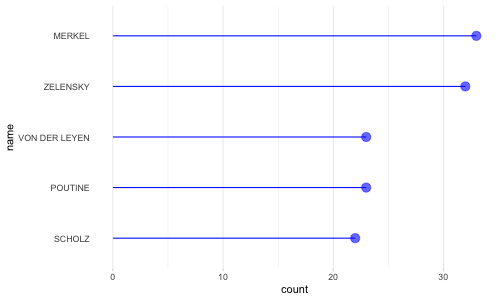

In [11]:
%%R -w 500 -h 300

# Libraries
library(ggplot2)

# Create data
data <- read.csv("./testing_data/names_count.csv")

data$name <- reorder(data$name, data$count)

# Horizontal version
ggplot(data, aes(x=name, y=count)) +
  # sort by count in descending order
  geom_segment( aes(x=name, xend=name, y=0, yend=count), color="blue") +
  geom_point( color="blue", size=4, alpha=0.6) +
  theme_light() +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  )


# ggsave("./viz/names_count.pdf", width = 16, height = 10)